# RECURRENT NEURAL NETWORK FOR STOCK PRICE PREDICTION

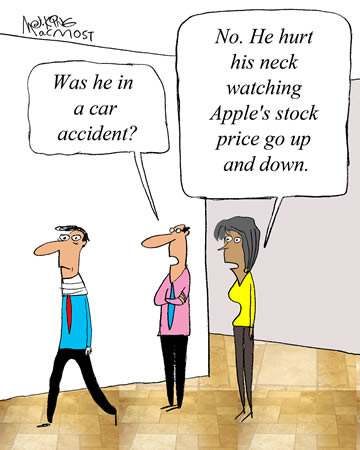

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (20,7)

In [3]:
# Importing the training set
training_set = pd.read_csv('Data/prices_Apple.csv')

In [4]:
training_set.head()

,date,symbol,open,close,low,high,volume
0,04-01-2010,AAPL,213.429998,214.009998,212.380001,214.499996,123432400
1,05-01-2010,AAPL,214.599998,214.379993,213.249994,215.589994,150476200
2,06-01-2010,AAPL,214.379993,210.969995,210.750004,215.230000,138040000
3,07-01-2010,AAPL,211.750000,210.580000,209.050005,212.000006,119282800
4,08-01-2010,AAPL,210.299994,211.980005,209.060005,212.000006,111902700


In [5]:
training_set = training_set.iloc[:,2:3].values

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [7]:
# Getting the inputs and the ouputs
X_train = training_set[0:1761]
y_train = training_set[1:1762]

In [8]:
# Reshaping
X_train = np.reshape(X_train, (1761, 1, 1))

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)


Using TensorFlow backend.


Epoch 1/100
1761/1761 [==============================] - 12s 7ms/step - loss: 1.1416
Epoch 2/100
1761/1761 [==============================] - 0s 264us/step - loss: 0.8621
Epoch 3/100
1761/1761 [==============================] - 0s 254us/step - loss: 0.6444
Epoch 4/100
1761/1761 [==============================] - 0s 259us/step - loss: 0.4783
Epoch 5/100
1761/1761 [==============================] - 0s 250us/step - loss: 0.3569
Epoch 6/100
1761/1761 [==============================] - 0s 258us/step - loss: 0.2671
Epoch 7/100
1761/1761 [==============================] - 0s 247us/step - loss: 0.2014
Epoch 8/100
1761/1761 [==============================] - 0s 260us/step - loss: 0.1552
Epoch 9/100
1761/1761 [==============================] - 1s 340us/step - loss: 0.1237
Epoch 10/100
1761/1761 [==============================] - 1s 345us/step - loss: 0.1024
Epoch 11/100
1761/1761 [==============================] - 0s 265us/step - loss: 0.0877
Epoch 12/100
1761/1761 [=============================

1761/1761 [==============================] - 0s 264us/step - loss: 6.4263e-04
Epoch 95/100
1761/1761 [==============================] - 1s 284us/step - loss: 6.4091e-04
Epoch 96/100
1761/1761 [==============================] - 1s 319us/step - loss: 6.3876e-04
Epoch 97/100
1761/1761 [==============================] - 1s 290us/step - loss: 6.3746e-04
Epoch 98/100
1761/1761 [==============================] - 0s 255us/step - loss: 6.3492e-04
Epoch 99/100
1761/1761 [==============================] - 0s 264us/step - loss: 6.3275e-04
Epoch 100/100
1761/1761 [==============================] - 0s 244us/step - loss: 6.3194e-04


In [11]:
test_set=pd.read_csv('Data/prices_Apple.csv')
real_stock_price=test_set.iloc[:,2:3].values

In [12]:
# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (1762, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)   

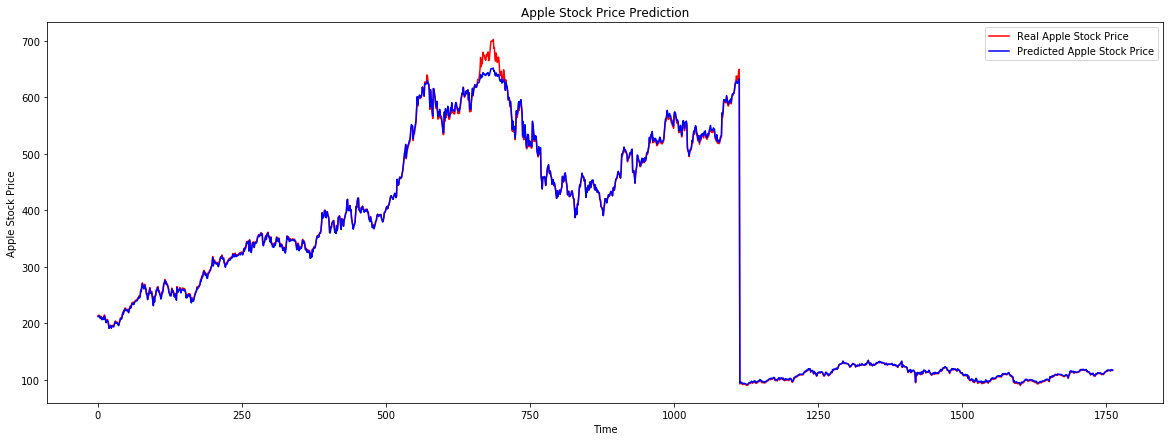

In [15]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()